# CNN for Traffic Sign Classification with TensorFlow 2

- [German Traffic Sign Dataset](https://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) from the GTSRB competition
- [Paper on applying CNNs to this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)


## Load train, validation, and test data

In [7]:
# Load pickled data
import pickle
import pandas as pd

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# separate X and y
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# load mapping from label number to name of label
signnames = pd.read_csv('signnames.csv')

## Exploratory Data Analysis (EDA)

In [12]:
# summary of data
n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)
img_shape = X_train[0].shape
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", img_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


View some signs and their labels. Though hard to see, they seem to make sense.

Class: Keep right


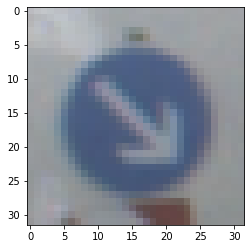

Class: Speed limit (100km/h)


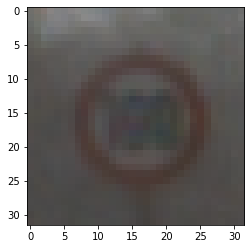

Class: Speed limit (20km/h)


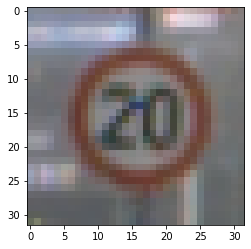

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# view some random training images and their labels
for _ in range(3):
    rand_idx = np.random.randint(0, n_train)
    print('Class:', signnames.iloc[y_train[rand_idx]]['SignName'])
    plt.imshow(X_train[rand_idx])
    plt.show()

View class distribution of the 3 data sets. Although there is some imbalance, the distribution seems similar across the 3 sets.

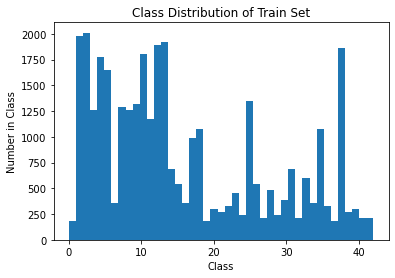

In [29]:
plt.hist(y_train, bins=n_classes)
plt.title('Class Distribution of Train Set')
plt.ylabel('Number in Class')
plt.xlabel('Class')
plt.show()

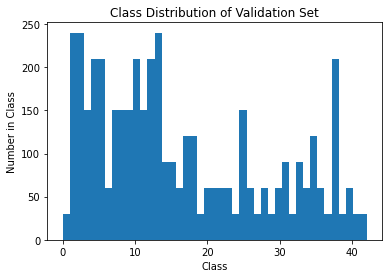

In [28]:
plt.hist(y_valid, bins=n_classes)
plt.title('Class Distribution of Validation Set')
plt.ylabel('Number in Class')
plt.xlabel('Class')
plt.show()

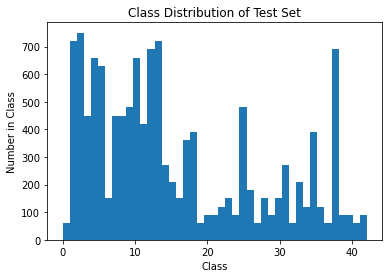

In [30]:
plt.hist(y_test, bins=n_classes)
plt.title('Class Distribution of Test Set')
plt.ylabel('Number in Class')
plt.xlabel('Class')
plt.show()

## Pre-Processing

## CNN Model Architecture

Default is the LeNet-5: 
![Lenet-5](lenet.png)

#### Low-level implementation (similar to TF 1):

In [31]:
def conv(x, W, b, strides):
    """
    Perform convolution
    
    Args:
        x (np.ndarray): input to be convolved
        W (tf.Variable): weights for the 'Xw' part of Xw + b
        b (tf.Variable): biases for the 'b' part of Xw + b
    """
    conv = tf.nn.conv2d(x, W, [1, strides, strides, 1], padding="VALID")
    return tf.nn.bias_add(conv, b)

def max_pool(x, k, s):
    """
    Perform max pooling
    
    Args:
        x (np.ndarray): input to be pooled
        k (int): kernel size, sometimes referred to as k or F
        s (int): stride length
    """
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, s, s, 1], padding="VALID")

In [ ]:
weights = {
    'wc1': tf.Variable(),
    'wc2': tf.Variable(),
    'fc1': tf.Variable(),
    'fc2': tf.Variable(),
    'fc3': tf.Variable()
}

biases = {
    'bc1': tf.Variable(),
    'bc2': tf.Variable(),
    'bc1': tf.Variable(),
    'bc2': tf.Variable(),
    'bc3': tf.Variable()
}

In [ ]:
def LeNet(x):
    # for weight/bias initialization
    mu = 0
    sigma = 0.1
    
    # first conv layer
    
    
    logits = 
    
    return logits

#### Higher level implementation w/ TF 2 'layers' and 'model'

#### Keras / TF2 Implementation